In [ ]:
In this post, we will learn how to apply  a low pass filter to a signal.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

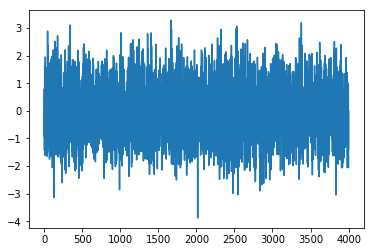

In [3]:
# Let's create dummy data
data = np.random.randn(4000)
plt.plot(data)

In [ ]:
To apply a filter on above data, we use well known Butterworth filter readily available in Scipy Library.
This filter has two important tunable parameters (i) Filter order: Filter order defines how many past 
elements (or how much delay) are used in calculating current output. At any time, outuput is calculated 
by using present input, past input and past output. So, more the past elements are used, the more aware
becomes the filter and hence more efficient. (ii) Cut_off Frequency: This defines the limit on the frequencies
which a filter should pass. Therfore, we should know correct values for filter order and cut_off frequency before
applying the filter. Let us find what all frequencies are present in our data with spectrogram

Text(0,0.5,'Spectrum Magnitude')

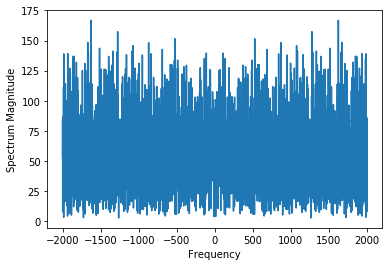

In [7]:
sampling_rate = 4000 # sampling rate defines number of observations in one second.
fft_data = np.fft.fft(data)
freqs = np.fft.fftfreq(n = len(fft_data), d = 1/sampling_rate)
fig, ax = plt.subplots()
ax.plot(freqs,abs(fft_data))
ax.set_xlabel('Frequency')
ax.set_ylabel('Spectrum Magnitude')

In [ ]:
Above plot shows that our data has frequencies till 2000. And you can play with filter order, the higher the better

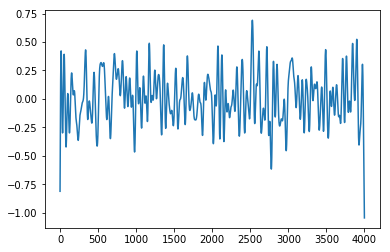

In [10]:
#Suppose the cut-off frequency is 100
fc = 100
#Design of digital filter requires cut-off frequency to be normalised by sampling_rate/2
w = fc /(sampling_rate/2)
b, a = signal.butter(5, w, 'low', analog = False)
output = signal.filtfilt(b, a, data)
plt.plot(output)

In [ ]:
The above plot shows our filtered signal, i.e., now our data has frequencies less than 100.